# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# Create a dataFrame with 10x rolling the dice
rolling_dice = np.random.choice(range(1, 7), size = 10)
rolling_dice = pd.DataFrame(rolling_dice)
rolling_dice

,0
0,1
1,1
2,5
3,3
4,2
5,3
6,1
7,4
8,2
9,2


#### 2.- Plot the results sorted by value.

In [4]:
rolling_dice.columns = ['roll']
rolling_dice = rolling_dice.sort_values(by = 'roll')

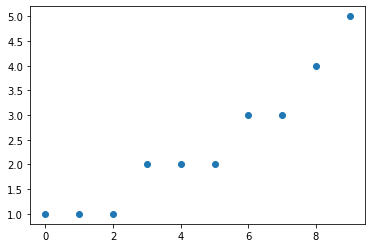

In [5]:
plt.scatter(range(len(rolling_dice.values)), rolling_dice.values)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([3., 0., 3., 0., 0., 2., 0., 1., 0., 1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

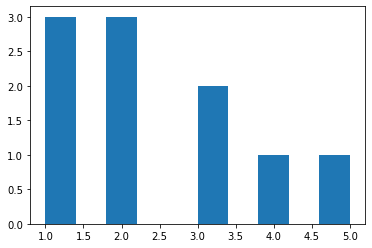

In [6]:
plt.hist(rolling_dice,)

In [7]:
"""
The first graph shows the number that we obtain each time that we rolled the dice, order by its value.
We have to count how many times we had that value to obtain the frequency of each value.

In the second graph we can easily see how many times each value appeared.
"""

'\nThe first graph shows the number that we obtain each time that we rolled the dice, order by its value.\nWe have to count how many times we had that value to obtain the frequency of each value.\n\nIn the second graph we can easily see how many times each value appeared.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# Calculating the mean the hard way -.-''

mean_roll = (rolling_dice['roll'].sum())/len(rolling_dice['roll'])
mean_roll

2.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# Frequency distribution
frequency = pd.DataFrame(rolling_dice['roll'].value_counts())
frequency['freq'] = (frequency.index)*(frequency['roll'])

# Mean:
meand_f = (frequency['freq'].sum())/(frequency['roll'].sum())
meand_f

2.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [50]:
#rolling_dice = rolling_dice.reset_index()
rolling_dice = rolling_dice.drop(['index'], axis = 1)

In [58]:
# Define a function
def median_df(dataFrame):
    # Check is the number of values are even or odd
    if len(dataFrame) % 2 == 0:
        n1 = len(dataFrame)/2-1
        n2 = len(dataFrame)/2
        median = (dataFrame.loc[n1]+dataFrame.loc[n2])/2
        return median
    elif len(dataFrame)%2 == 1:
        n1 = (len(dataFrame)-1)/2
        median = (dataFrame.loc[n1])
        return median
    
# Confirming that the function is correctly calculating the median:
print(median_df(rolling_dice))
print(rolling_dice.median())

roll    2.5
dtype: float64
roll    2.5
dtype: float64


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [62]:
rolling_dice

,roll
0,1
1,2
2,2
3,2
4,2
5,3
6,3
7,3
8,3
9,5


In [71]:
def quartiles_df(dataFrame):
    data_size = len(dataFrame)
    # Check is the number of values are even
    if data_size % 2 == 0:
        # Find the index for each quarile
        n1 = data_size/2-1   #0.5
        n2 = data_size/2     #0.5
        n3 = (n1)/2          # 0.25
        n4 = n3+n2           #0.75
        # Retrive the value
        q1 = dataFrame.loc[n3]
        q2 = (dataFrame.loc[n1]+dataFrame.loc[n2])/2
        q3 = dataFrame.loc[n4]
        return f'q1 = {q1}, q2 ={q2}, q3={q3}'
    
    # Check is the number of values are even
    else:
        n1 = data_size/2
        n2 = n1/2
        n3 =n1 + n2
        q1 = dataFrame.loc[n2]
        q2 = dataFrame.loc[n1]
        q3 = dataFrame.loc[n3]
        return  f'q1 = {q1}, q2 ={q2}, q3={q3}'

print(quartiles_df(rolling_dice))

print(rolling_dice['roll'].quantile([0.25, 0.5, 0.75]))

q1 = roll    2
Name: 2, dtype: int64, q2 =roll    2.5
dtype: float64, q3=roll    3
Name: 7, dtype: int64
0.25    2.0
0.50    2.5
0.75    3.0
Name: roll, dtype: float64


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [33]:
# Read csv
roll = pd.read_csv('../lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')
roll

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [130]:
#roll = roll.sort_values('value')
#roll = roll.reset_index()
roll = roll.drop(columns=[ 'index'])
roll

,Unnamed: 0,roll,value
0,0,0,1
1,47,47,1
2,56,56,1
3,9,9,1
4,73,73,1
...,...,...,...
95,17,17,6
96,11,11,6
97,24,24,6
98,21,21,6


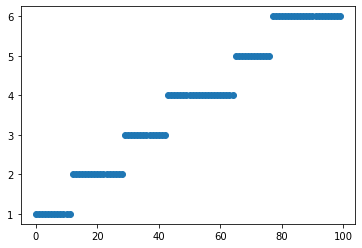

In [131]:
plt.scatter(roll.index, roll['value'])


In [ ]:
"""
We can see that some values (2, 3, 6) appear more times then others
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [132]:
# Define a function
def median_df(dataFrame):
    # Check is the number of values are even or odd
    if len(dataFrame) % 2 == 0:
        n1 = len(dataFrame)/2-1
        n2 = len(dataFrame)/2
        median = (dataFrame.loc[n1]+dataFrame.loc[n2])/2
        return median
    elif len(dataFrame)%2 == 1:
        n1 = (len(dataFrame)-1)/2
        median = (dataFrame.loc[n1])
        return median
    
# Confirming that the function is correctly calculating the median:
print(median_df(roll['value']))
print(roll.median())

4.0
Unnamed: 0    49.5
roll          49.5
value          4.0
dtype: float64


#### 3.- Now, calculate the frequency distribution.


In [133]:
# Frequency distribution
roll_1 = pd.DataFrame(roll)
roll_1

frequency = pd.DataFrame(roll['value'].value_counts())
frequency = frequency.sort_index()
frequency

,value
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

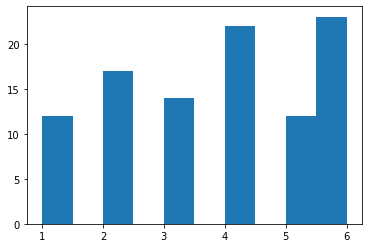

In [134]:
plt.hist(roll['value'])

In [135]:
"""
Here it's possible to observe that the value of 4 and 6 are the ones that are showed more times
"""

"\nHere it's possible to observe that the value of 4 and 6 are the ones that are showed more times\n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

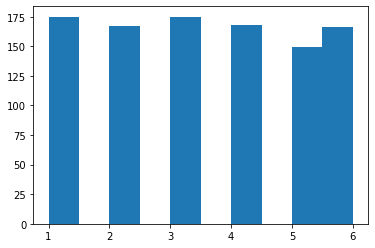

In [19]:
# Read csv
roll_thous = pd.read_csv('../lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')

plt.hist(roll_thous['value'])

In [18]:
"""
The number of times each value appears is more similar to each other, and the mean is closer to the in the middle 
"""

'\nThe number of times each value appears is more similar to each other, and the mean is closer to the in the middle \n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

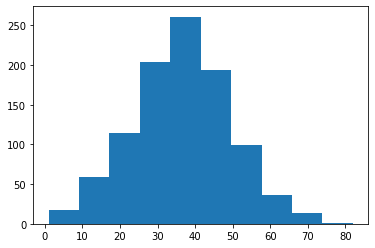

In [20]:
ages_p = pd.read_csv('../lab-understanding-descriptive-stats/data/ages_population.csv')
plt.hist(ages_p)


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [142]:
print(ages_p.mean())  
print(ages_p.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
By observing the graph, I would say that the mean was inferior to the calculated value. 
As for the standard deviation the value is actually higher then I originally though 

"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <BarContainer object of 10 artists>)

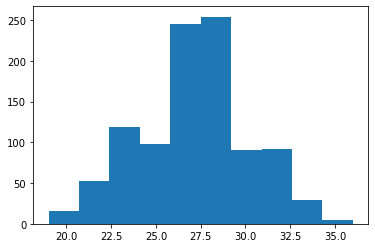

In [22]:
ages_p2 = pd.read_csv('../lab-understanding-descriptive-stats/data/ages_population2.csv')
plt.hist(ages_p2)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The range of ages is smaller and the values are also miner comparing with the first example.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [144]:
print(ages_p2.mean())  
print(ages_p2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
As expected the mean and stand deviation are lower than in the previous dataset.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

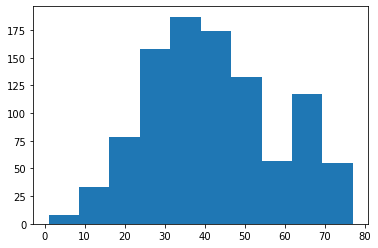

In [23]:
ages_p3 = pd.read_csv('../lab-understanding-descriptive-stats/data/ages_population3.csv')
plt.hist(ages_p3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [14]:
print(ages_p3.mean())  
print(ages_p3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
Since we have a wider range of values of age and most of the ages are between 25-50,
the mean is higher than in the previous datasets, and the same applies to the std.
We can also see a clear peak between 60/70 years that affects the mean value.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [27]:
print(ages_p3.quantile([0.25, 0.5, 0.75, 1]))
print(ages_p3.median())

      observation
0.25         30.0
0.50         40.0
0.75         53.0
1.00         77.0
observation    40.0
dtype: float64


In [ ]:
"""
Q1-Q2= 10
Q2-Q3= 13
Q3-Q4= 24

Q2 == Mean
This happens because the plot looks similar to a normal distribution, but the peak in values near 70 years alters the expected results.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
print(ages_p3.quantile([0.25, 0.5, 0.60, 0.75, 0.90, 1]))

      observation
0.25         30.0
0.50         40.0
0.60         45.0
0.75         53.0
0.90         67.0
1.00         77.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""